In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from google.colab import drive

# Pitcher

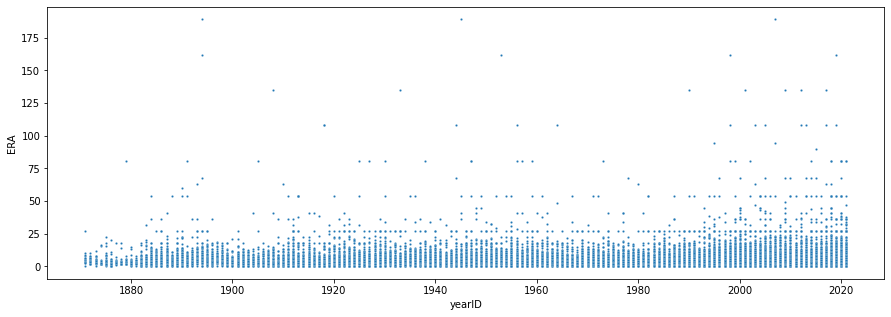

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))

##Gathering data
pitching = pd.read_csv('Pitching.csv')
pitching = pitching[['playerID', 'yearID', 'G', 'H','IPouts', 'BFP', 'ERA','teamID']]
players = pd.read_csv('People.csv')
players = players [['playerID', 'nameFirst', 'nameLast']]
pitchers = pd.merge(players, pitching, on='playerID')

batting = pd.read_csv('Batting.csv')
people = pd.read_csv('People.csv')
salary = pd.read_csv('Salaries.csv')
Teams = pd.read_csv('Teams.csv')
playerHits = pd.merge(batting, people, on='playerID')

##ERA per year per pitcher from original data
sns.scatterplot(data=pitchers, x='yearID', y='ERA', s=5)

(1.0, 15.0)

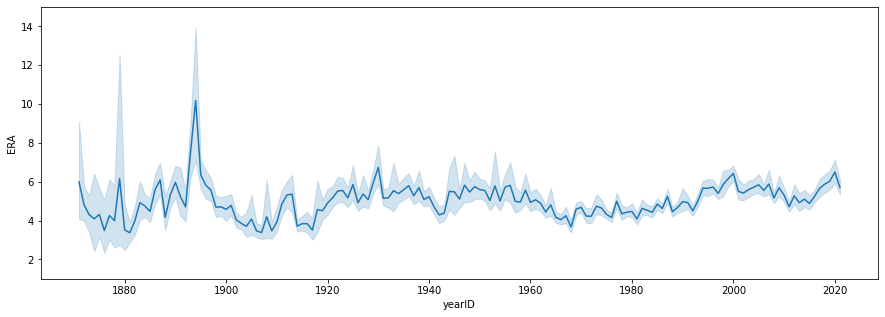

In [88]:
fig, ax = plt.subplots(figsize=(15, 5))

##Grouping data by pitcher and summing games, BFP, and ERA
pitcherERA = pitchers.groupby(['playerID']).agg({'G':'sum', 'IPouts':'sum', 'BFP':'sum', 'ERA':'mean'}).reset_index()
sns.lineplot(data=pitchers, x='yearID', y='ERA')
plt.ylim([1, 15])

(1.0, 15.0)

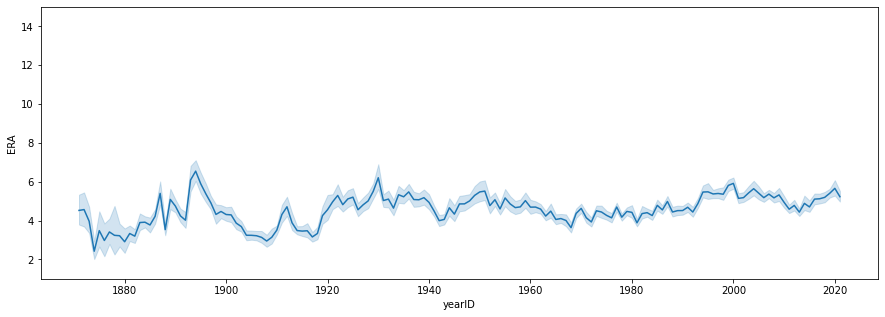

In [89]:
fig, ax = plt.subplots(figsize=(15, 5))

##Removing players with 1 game or IPout
pitchersOutliers = pitchers[(pitchers.G > 1) & (pitchers.IPouts > 1)]
sns.lineplot(data=pitchersOutliers, x='yearID', y='ERA')
plt.ylim([1, 15])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

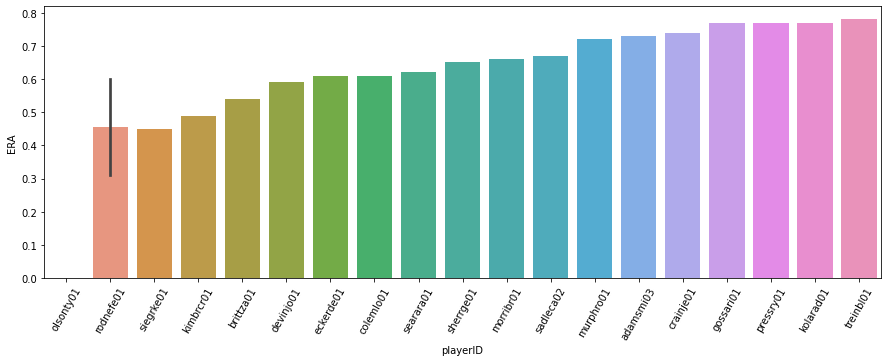

In [90]:
fig, ax = plt.subplots(figsize=(15, 5))

##20 best pitchers by ERA exluding outliers from above
pitchersHighGames = pitchersOutliers[(pitchersOutliers.G > 25)]
best20Pitchers = pitchersHighGames.sort_values(by='ERA', ascending=True).head(20)

##Lowest ERA(more pitches with unsucessful hits) per pitcher with more than 25 games (played at least part of a season)
sns.barplot(data=best20Pitchers, x='playerID', y='ERA')
plt.xticks(rotation=60)

# Manager

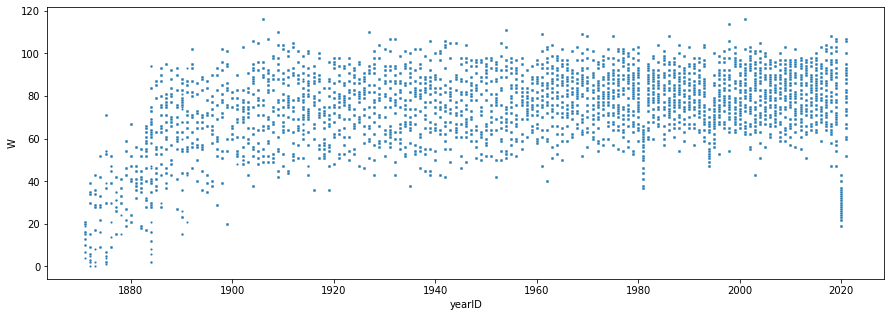

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))

##Gathering data
teams = pd.read_csv('Teams.csv')
teams = teams[['teamID','yearID','G','W','L']]
managers = pd.read_csv('Managers.csv')
managers = managers[['playerID','teamID', 'rank']]
teamManagers = pd.merge(managers, teams, on='teamID')

##Manager wins per year from original data
sns.scatterplot(data=teamManagers, x='yearID', y='W', s=5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

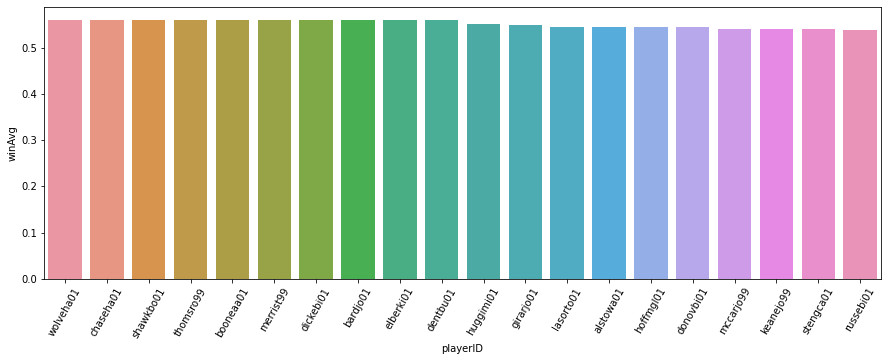

In [92]:
fig, ax = plt.subplots(figsize=(15, 5))

##Determine best manager after season length 162 games
managerWins1961 = teamManagers[(teamManagers.yearID > 1960)]
managerWins1961 = managerWins1961.groupby(['playerID']).agg({'G':'sum', 'W':'sum'}).reset_index()
managerWins1961['winAvg'] = managerWins1961['W'] / managerWins1961['G']
best20ManagerWins = managerWins1961.sort_values(by='winAvg', ascending=False).head(20)

##Top 20 managers with highest win average for season lasting 162 games
sns.barplot(data=best20ManagerWins, x='playerID', y='winAvg')
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

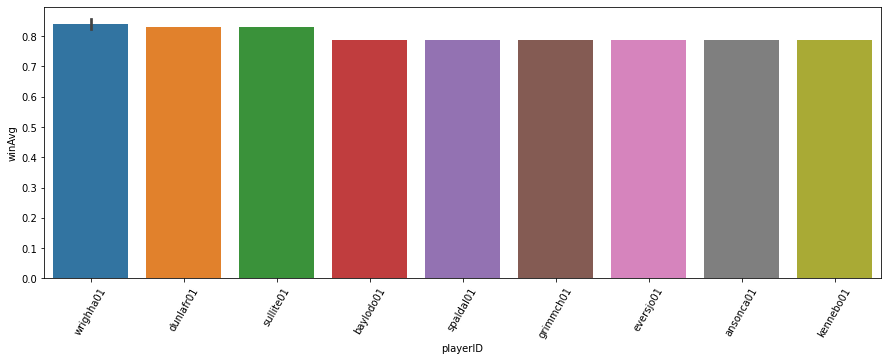

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))

##Determine average wins per manager for all MLB
teamManagers['winAvg'] = teamManagers['W'] / teamManagers['G']
managerWins = teamManagers.sort_values(by='winAvg', ascending=False).head(20)

##Top 20 (turned out to be 9) managers with best win average for all of MLB
sns.barplot(data=managerWins, x='playerID', y='winAvg')
plt.xticks(rotation=60)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

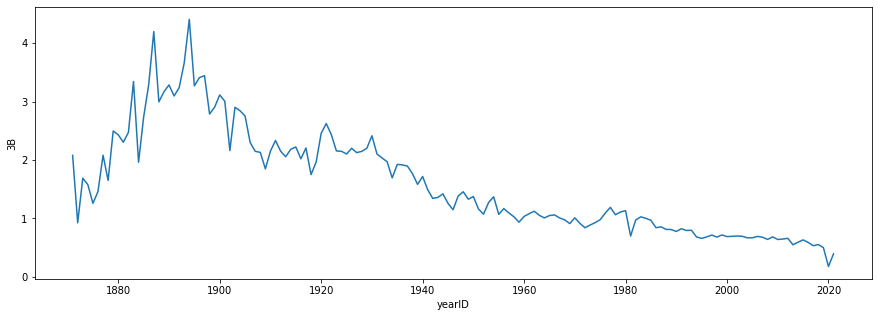

<Figure size 432x288 with 0 Axes>

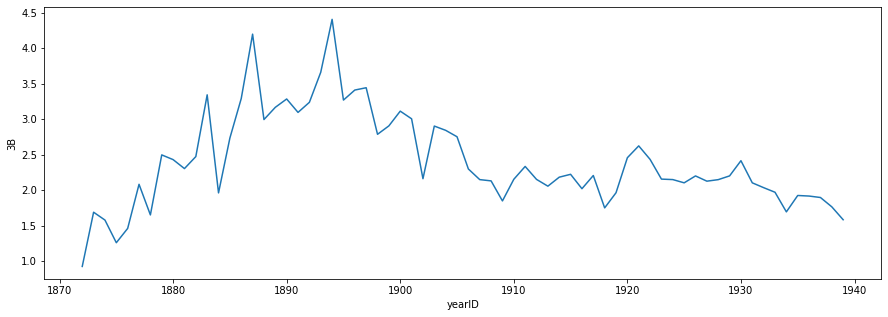

<Figure size 432x288 with 0 Axes>

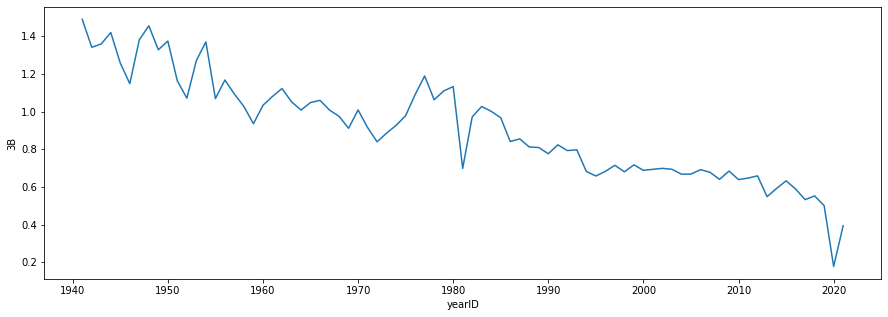

<Figure size 432x288 with 0 Axes>

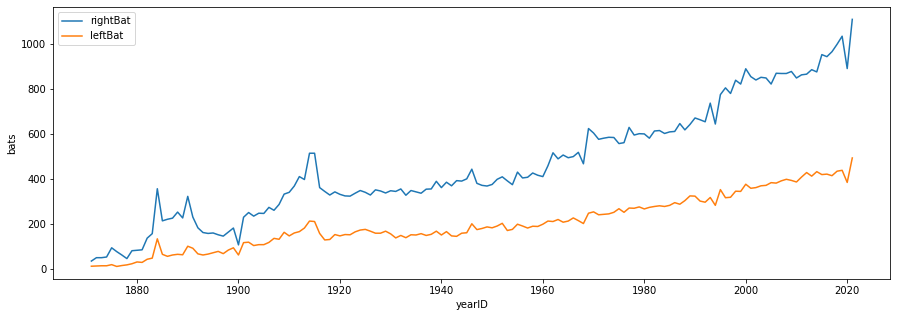

In [94]:
fig, ax = plt.subplots(figsize=(15, 5))
batting = batting[['yearID', '3B', 'playerID']]
groupByYear = batting.groupby('yearID').agg({'3B':'mean'}).reset_index()
sns.lineplot('yearID', '3B', data=groupByYear)

plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
phase1 = groupByYear[(groupByYear.yearID > 1871) & (groupByYear.yearID < 1940)]
sns.lineplot('yearID', '3B', data=phase1)

plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
phase1 = groupByYear[(groupByYear.yearID > 1940)]
sns.lineplot('yearID', '3B', data=phase1)

num_right = playerHits[playerHits.bats == 'R']
num_left = playerHits[playerHits.bats == 'L']
groupByRightPlayed = num_right.groupby('yearID').agg({'bats':'count'}).reset_index()
groupByLeftPlayed = num_left.groupby('yearID').agg({'bats':'count'}).reset_index()

plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot('yearID', 'bats', data=groupByRightPlayed, label='rightBat')
sns.lineplot('yearID', 'bats', data=groupByLeftPlayed, label='leftBat')
plt.legend()

# Often called "the most exciting play in baseball," a triple occurs when a batter hits the ball into play and reaches third base without the help of an
# https://www.mlb.com/glossary/standard-stats/triple
# https://coachingkidz.com/the-ultimate-resource-on-hits-in-baseball-1b-2b-3b-hr/

# strength decreasing
# right field longer
# wild pitches
# https://coachesinsider.com/baseball/common-third-base-mistakes-article/


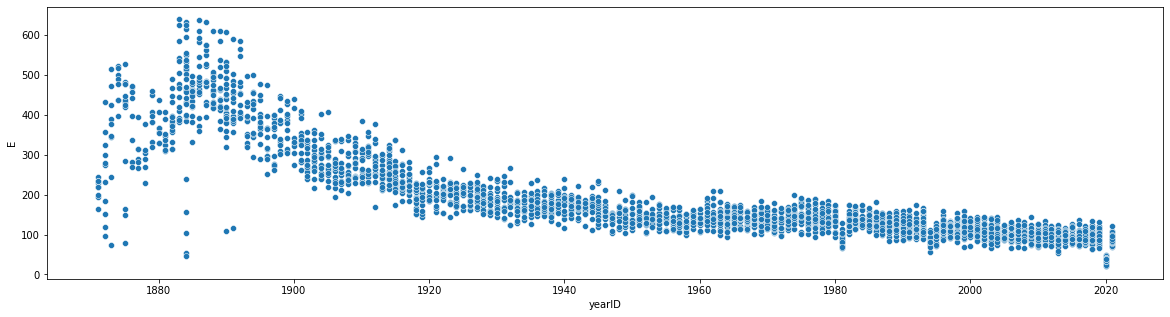

<Figure size 432x288 with 0 Axes>

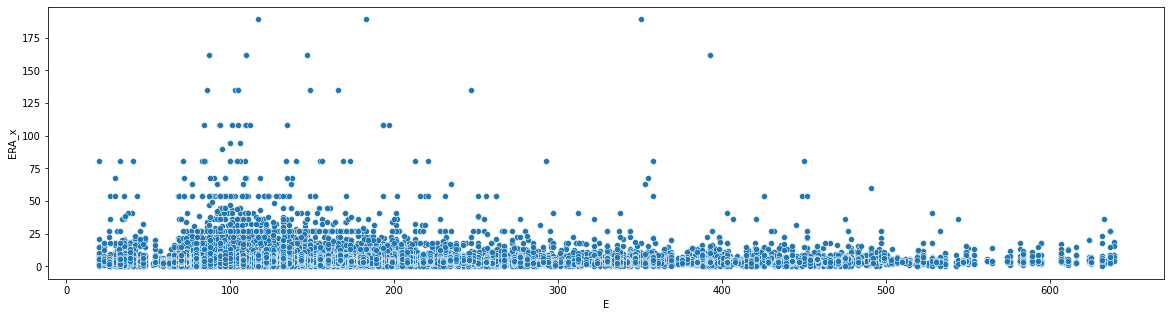

<Figure size 432x288 with 0 Axes>

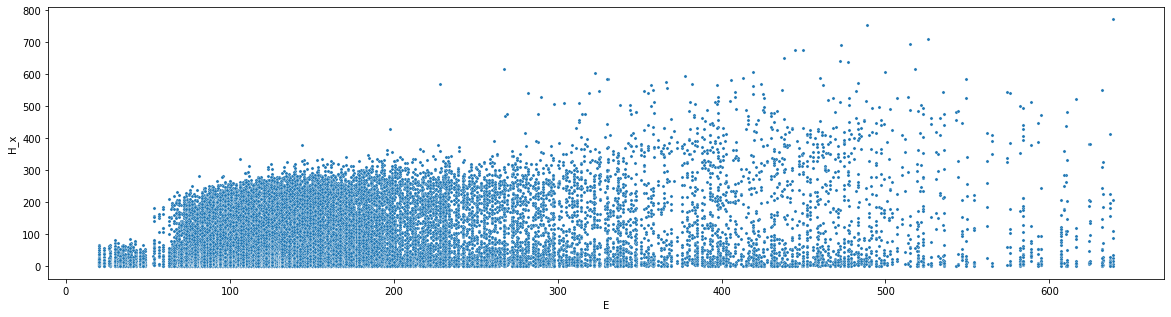

In [95]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(y='E', x='yearID', data=Teams)

plt.figure()
fig, ax = plt.subplots(figsize=(20, 5))
playerERA = pd.merge(pitching, Teams, on=['yearID', 'teamID'])
sns.scatterplot(y='ERA_x', x='E', data=playerERA)

plt.figure()
fig, ax = plt.subplots(figsize=(20, 5))
sns.scatterplot(y='H_x', x='E', data=playerERA, s=10)
# https://www.rookieroad.com/baseball/what-is-error/
